In [1]:
import pandas as pd
import tqdm
import matplotlib.pyplot as plt
import numpy as np

from generation.data.data_preparation import get_attributes_df, \
                                             get_detector_event_df, \
                                             generate_one_signal, \
                                             postprocess_signal

In [2]:
DETECTOR_NUM = 4
df = get_attributes_df()
df = get_detector_event_df(df, detector=DETECTOR_NUM)

In [3]:
unique_events = df['event'].unique()
events_dfs = [df[df['event'] == int(event)] for event in tqdm.tqdm(unique_events)]

100%|██████████| 74/74 [00:39<00:00,  1.88it/s]


In [4]:
events_energies = [np.sum(event_df['energy']) for event_df in events_dfs]

In [6]:
events_signals = [generate_one_signal(event_df, sample_coef=1) for event_df in tqdm.tqdm(events_dfs)]

100%|██████████| 74/74 [06:55<00:00,  5.61s/it]


In [16]:
events_amplitudes = [np.max(signal) for signal in events_signals]

In [17]:
events_ratios = [energy / amplitude for energy, amplitude in zip(events_energies, events_amplitudes)]

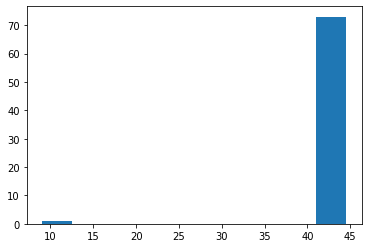

In [19]:
plt.hist(events_ratios)
plt.show()